# **D210 Performance Assessment:** Data Cleaning for Reporting and Representation  

**Student:** Chris Fischer  
**ID:** 011933891  
**Dataset:** Churn  
---

## Initialization
---

In [26]:
#import needed libraries
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

#allow pd.describe to show all columns of the data frame [In-Text Citation: (Ray, 2020)]
pd.options.display.max_columns = None 

#load church_missing_data.csv
df = pd.read_csv('churn_clean.csv', keep_default_na=False)

#Copy the survey response variables and rename for better clarity
df[['Survey_Timely Responses', \
          'Survey_Timely Fixes', \
          'Survey_Timely Replacements', \
          'Survey_Reliability', \
          'Survey_Options', \
          'Survey_Respectful', \
          'Survey_Courteous', \
          'Survey_Active Listening']] = \
		  df[['Item1', \
                    'Item2', \
                    'Item3', \
                    'Item4', \
                    'Item5', \
                    'Item6', \
                    'Item7', \
                    'Item8']]
df = df.drop(['Item1','Item2','Item3','Item4','Item5','Item6','Item7','Item8'], axis=1)
df.info()

#Initialize some lists to speed cleansing
survey_answers = [1,2,3,4,5,6,7,8]
numerical_variables = ['Age','Income','Children','Tenure','Outage_sec_perweek','MonthlyCharge','Bandwidth_GB_Year','Email','Contacts','Yearly_equip_failure']
categorical_variables = ['State','Area']
onehot_variables = ['Marital','Gender']
yes_no_variables = ['Techie','Port_modem','Tablet','Phone','Multiple','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Churn']
survey_variables = ['Survey_Timely Responses','Survey_Timely Fixes','Survey_Timely Replacements','Survey_Reliability','Survey_Options','Survey_Respectful','Survey_Courteous','Survey_Active Listening']

# Explanatory variables
X_full = numerical_variables + categorical_variables + onehot_variables + yes_no_variables + survey_variables
X_vars = X_full.copy()
X_vars.remove('Churn')

#  Dependent variable
y_vars = ['Churn']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CaseOrder                   10000 non-null  int64  
 1   Customer_id                 10000 non-null  object 
 2   Interaction                 10000 non-null  object 
 3   UID                         10000 non-null  object 
 4   City                        10000 non-null  object 
 5   State                       10000 non-null  object 
 6   County                      10000 non-null  object 
 7   Zip                         10000 non-null  int64  
 8   Lat                         10000 non-null  float64
 9   Lng                         10000 non-null  float64
 10  Population                  10000 non-null  int64  
 11  Area                        10000 non-null  object 
 12  TimeZone                    10000 non-null  object 
 13  Job                         1000

## Cleaning
---

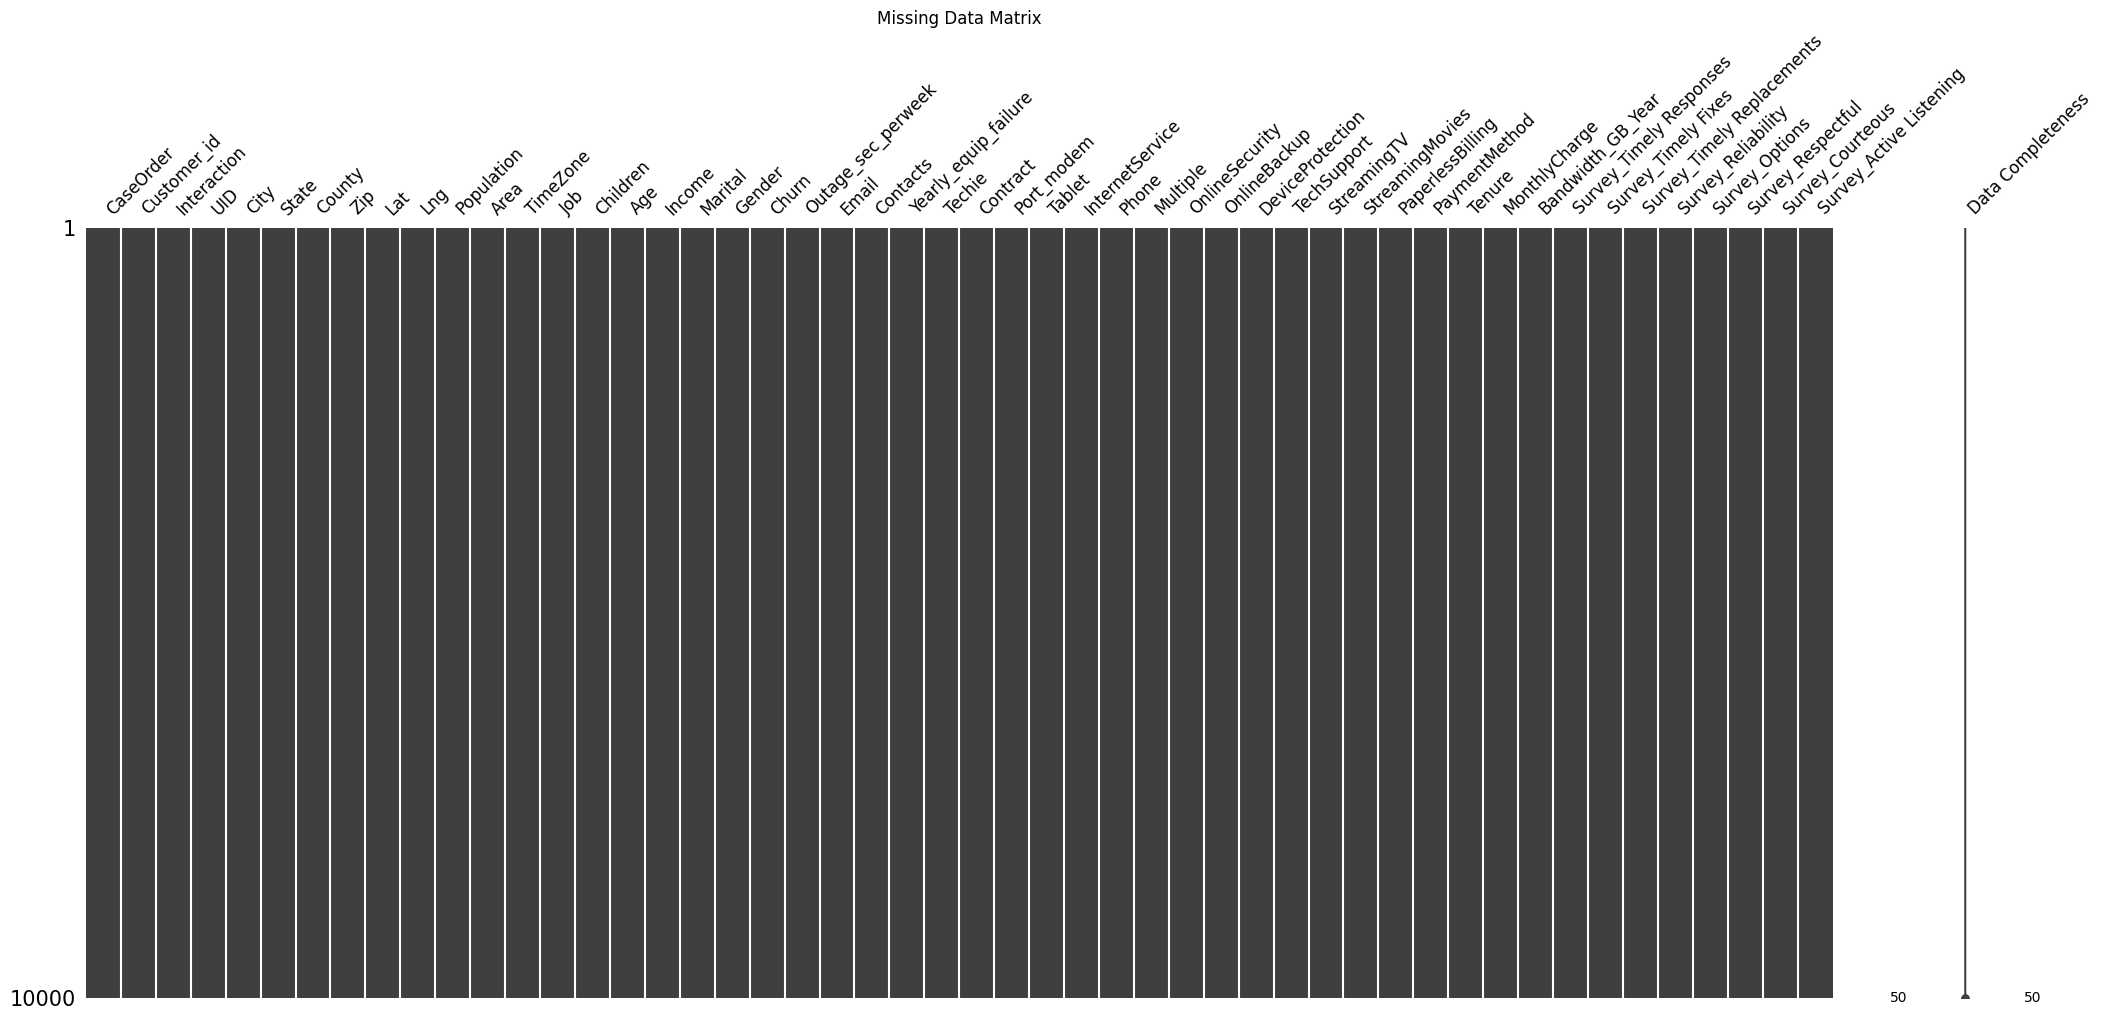

In [27]:
# Check missing data
msno.matrix(df, fontsize = 12, labels=True)
plt.title('Missing Data Matrix')
plt.show()

In [28]:
# Check survey question validity
print(df[survey_variables][~df[survey_variables].isin(survey_answers)].count()) 

Survey_Timely Responses       0
Survey_Timely Fixes           0
Survey_Timely Replacements    0
Survey_Reliability            0
Survey_Options                0
Survey_Respectful             0
Survey_Courteous              0
Survey_Active Listening       0
dtype: int64


In [29]:
#Check values in yes/no variables
print(df[yes_no_variables][~df[yes_no_variables].isin(['Yes','No'])].count())

Techie              0
Port_modem          0
Tablet              0
Phone               0
Multiple            0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Churn               0
dtype: int64


In [30]:
#Detect potential outliers
df_z = (df[numerical_variables] - df[numerical_variables].mean())/df[numerical_variables].std(ddof=0)
outlier_cols = df_z.loc[: , (df_z > 3.0).any()].columns
for col in outlier_cols :
    cnt = len(df_z[df_z[col]>3])
    minval, maxval = df[col].min(), df[col].max()
    print('Likely outlier for {0:<20}\t Count: {1:7d} ({2:5.2%} of observations)\tMin: {3:>9.2f}\tMax: {4:>9.2f}'.format(col,cnt,cnt/10000,minval,maxval))

Likely outlier for Income              	 Count:     145 (1.45% of observations)	Min:    348.67	Max: 258900.70
Likely outlier for Children            	 Count:     191 (1.91% of observations)	Min:      0.00	Max:     10.00
Likely outlier for Outage_sec_perweek  	 Count:      15 (0.15% of observations)	Min:      0.10	Max:     21.21
Likely outlier for Email               	 Count:       3 (0.03% of observations)	Min:      1.00	Max:     23.00
Likely outlier for Contacts            	 Count:     165 (1.65% of observations)	Min:      0.00	Max:      7.00
Likely outlier for Yearly_equip_failure	 Count:      94 (0.94% of observations)	Min:      0.00	Max:      6.00


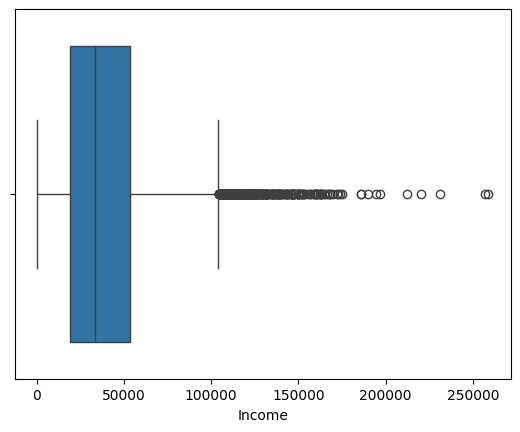

Income
36461.20    2
66644.71    2
61325.92    2
29353.41    2
25598.66    2
           ..
15130.44    1
20068.93    1
93936.05    1
13642.29    1
9020.92     1
Name: count, Length: 9993, dtype: int64


In [31]:
# Deeper look at Income
sns.boxplot(data=df, x='Income')
plt.show()
print(df['Income'].value_counts())

## Transformations
---

In [32]:
# Reexpress survey responses so that 1 is worst and 8 is best
survey_dict = {1: 8, 2: 7, 3 : 6, 4: 5, 5: 4, 6: 3, 7 : 2, 8 : 1}
for col in survey_variables:
    df[col] = df[col].map(survey_dict)

## EDA Visualizations
---

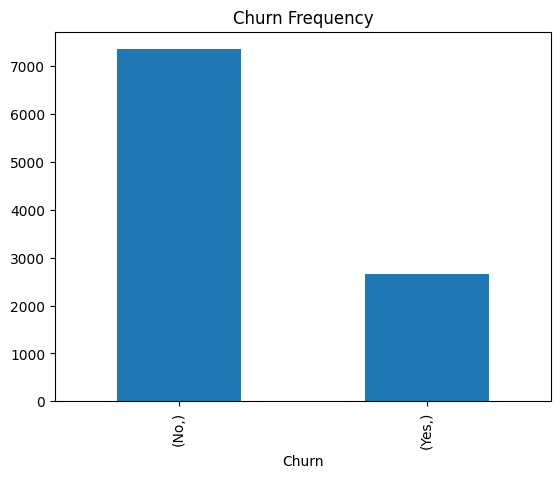

In [33]:
# Dependent variable
df[y_vars].value_counts().sort_index().plot(kind='bar')
#plt.xlabel('Bandwidth per Year (GB)')
#plt.ylabel('n Observations')
plt.title('Churn Frequency')
plt.show()

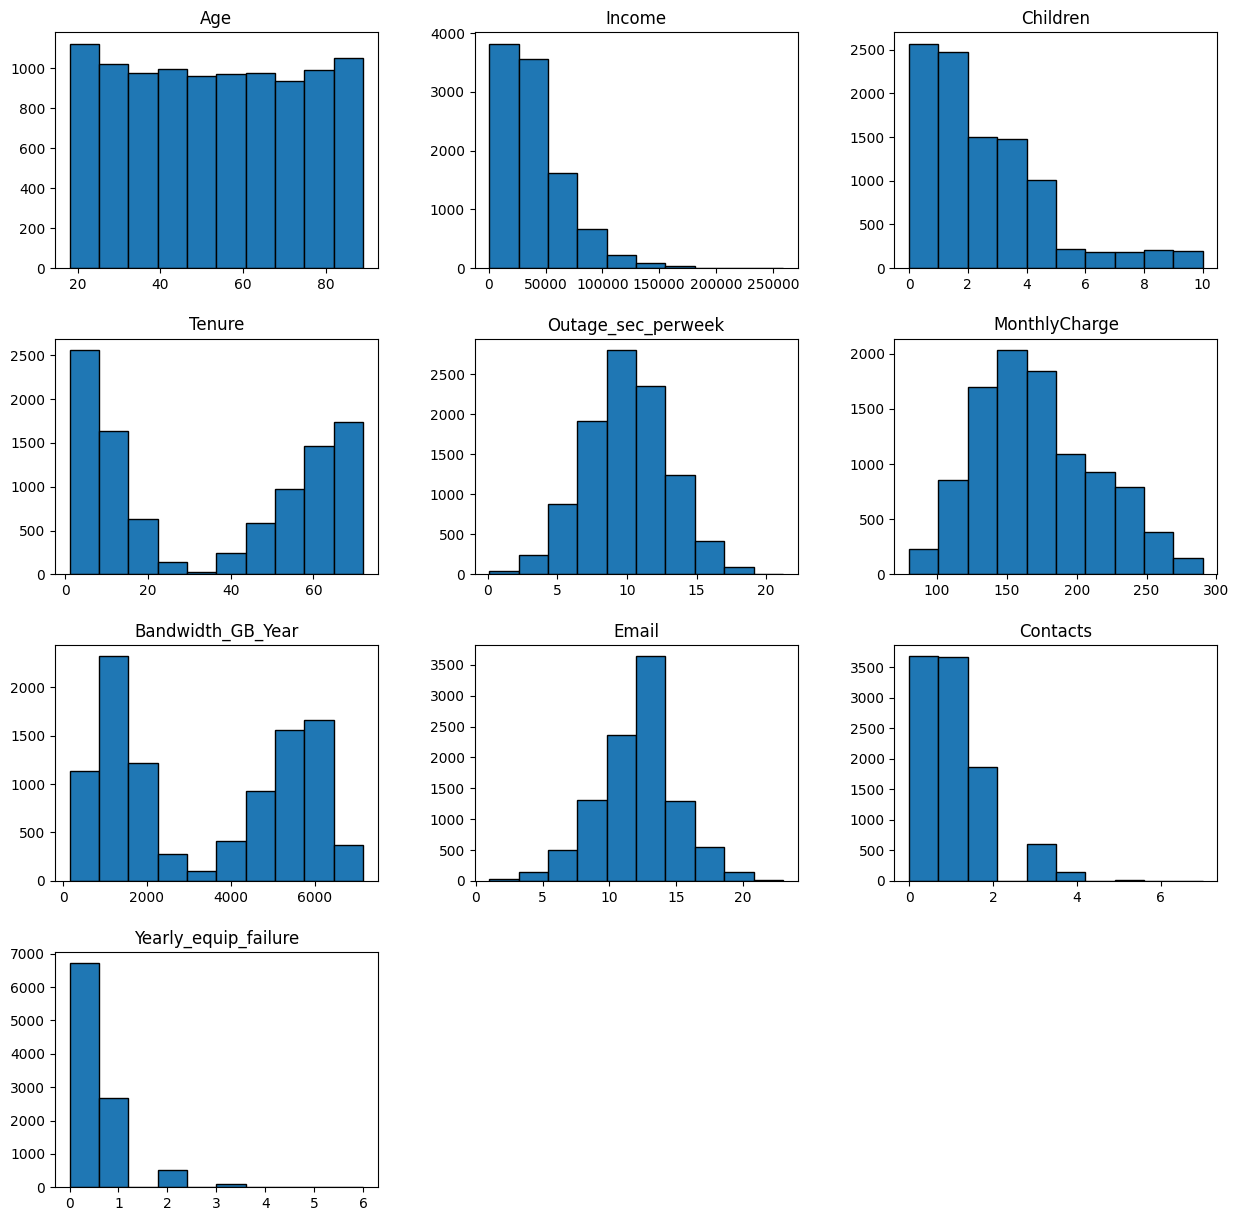

In [34]:
# Independent numeric variables univariate
df.hist(numerical_variables, grid=False, edgecolor='black', figsize=(15,15))
plt.show()

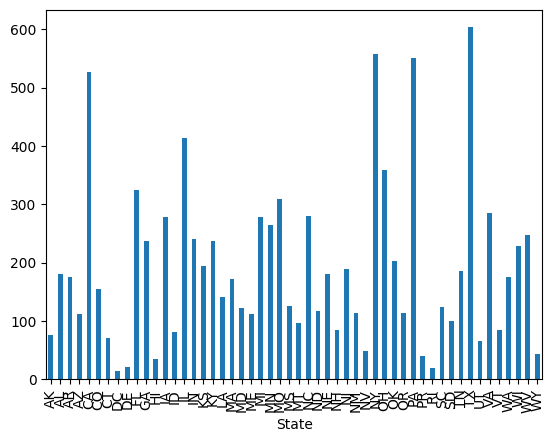

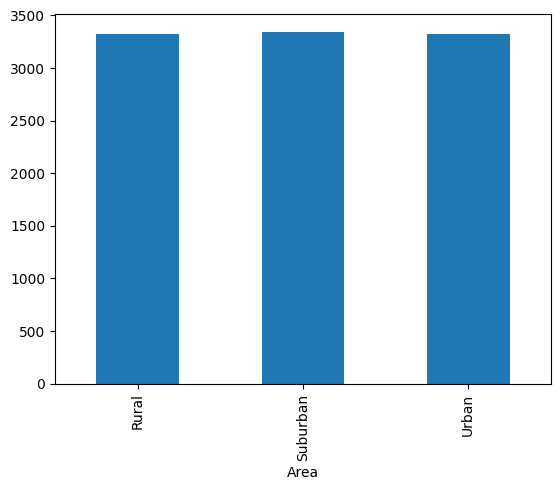

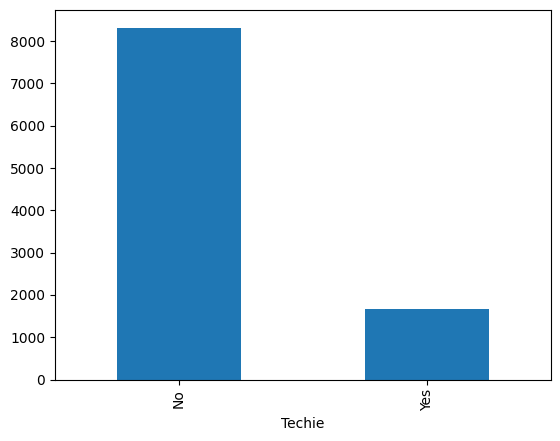

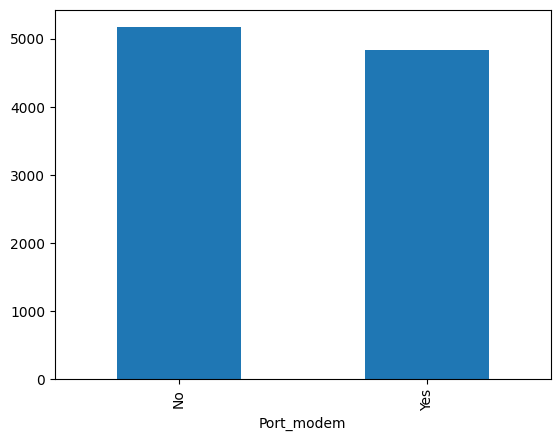

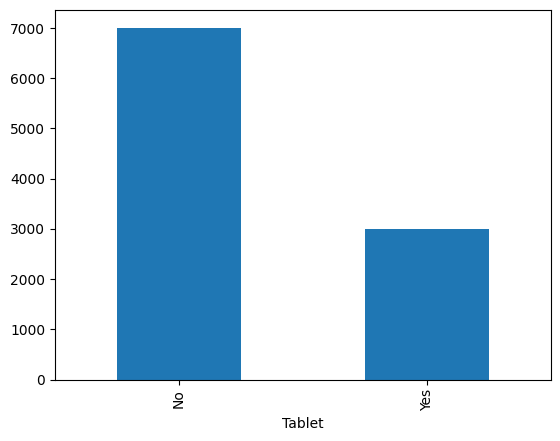

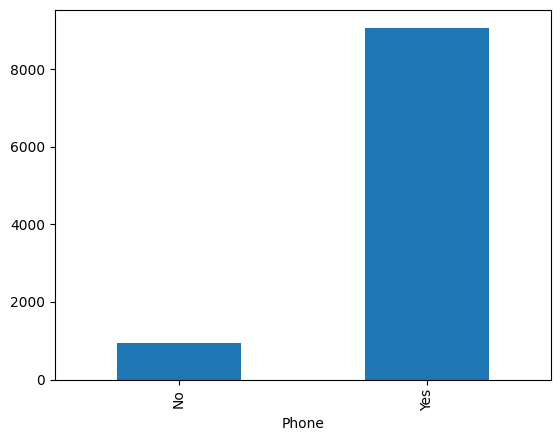

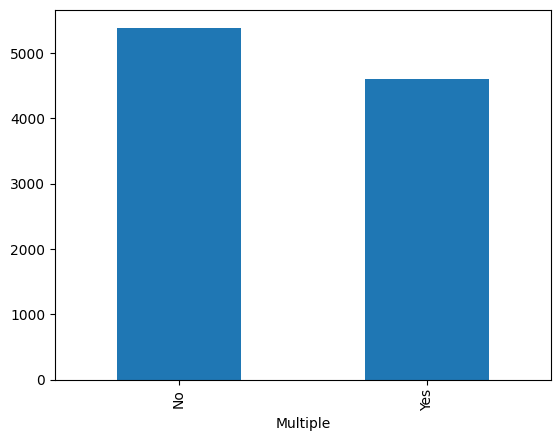

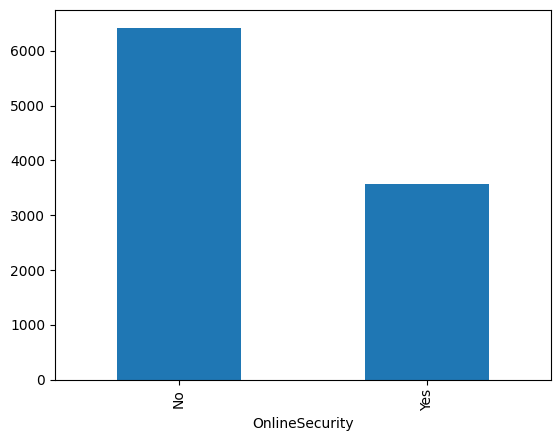

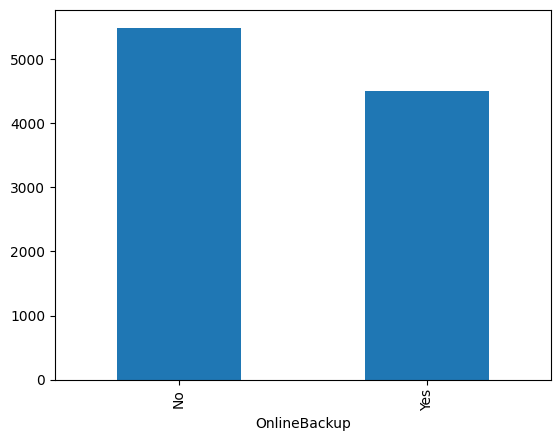

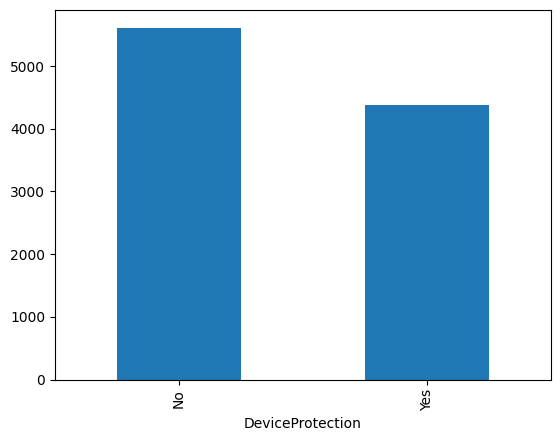

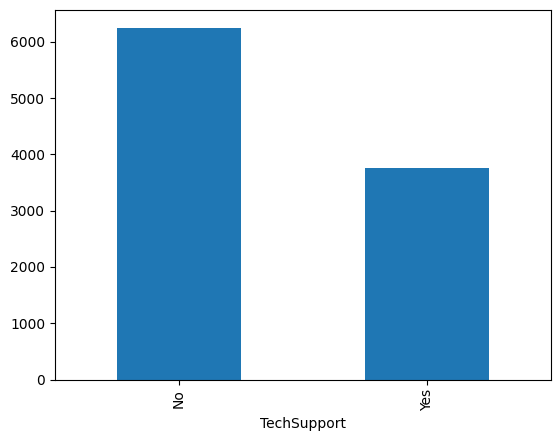

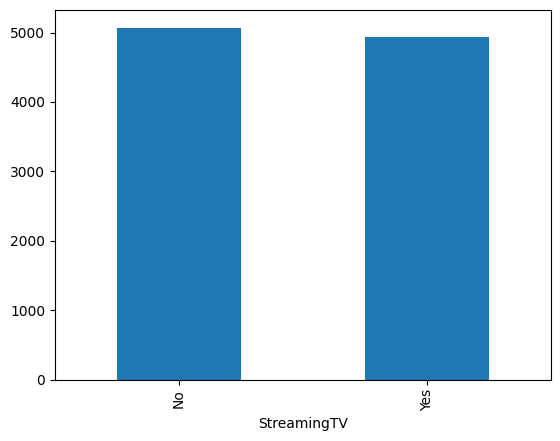

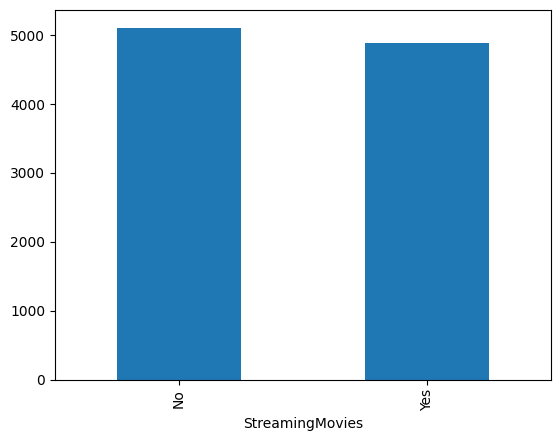

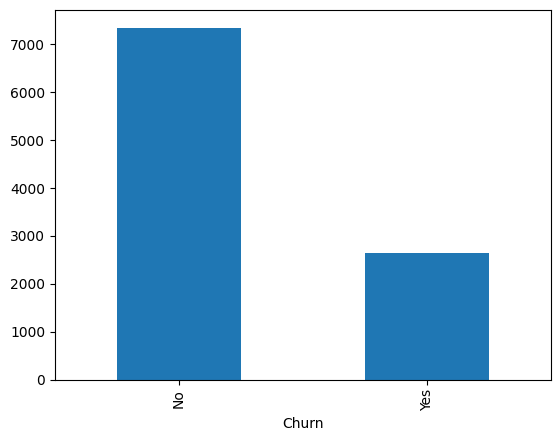

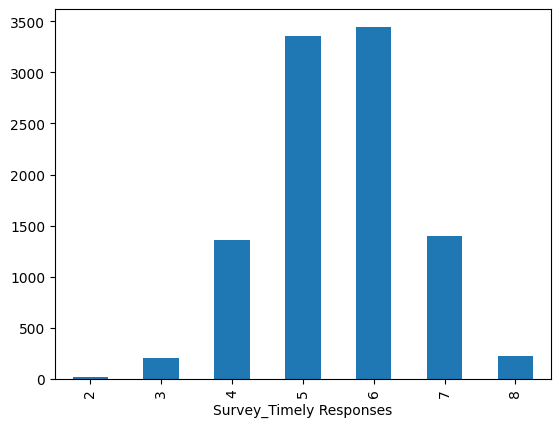

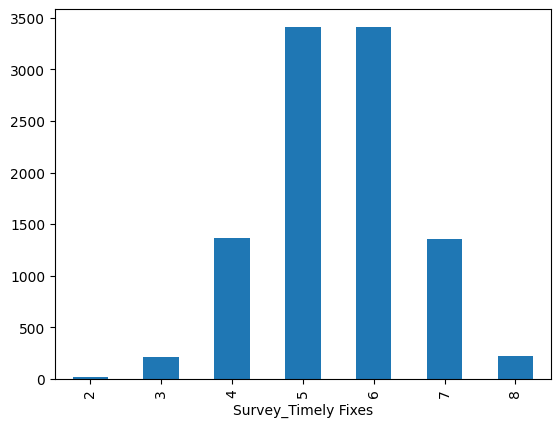

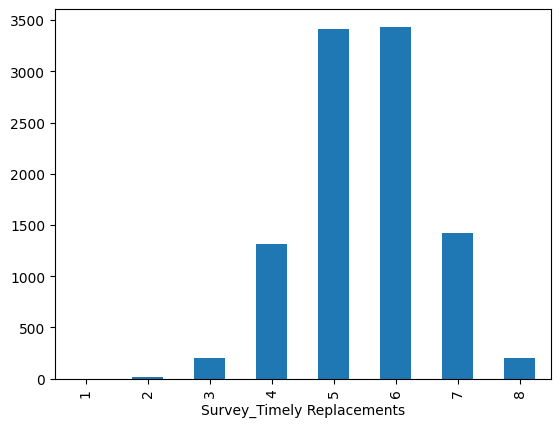

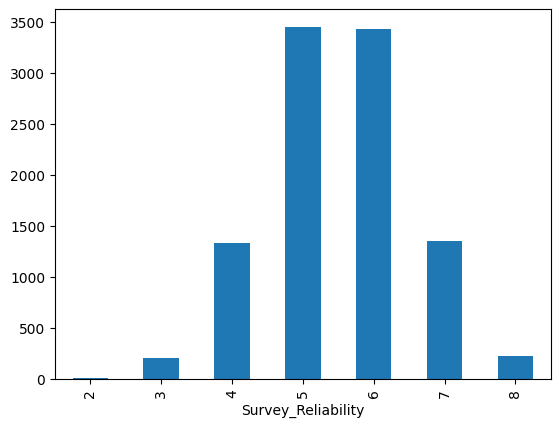

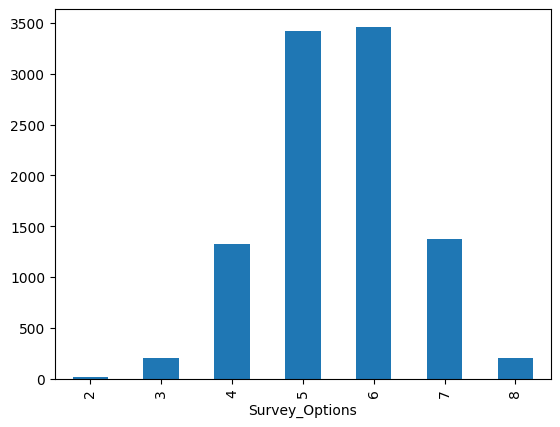

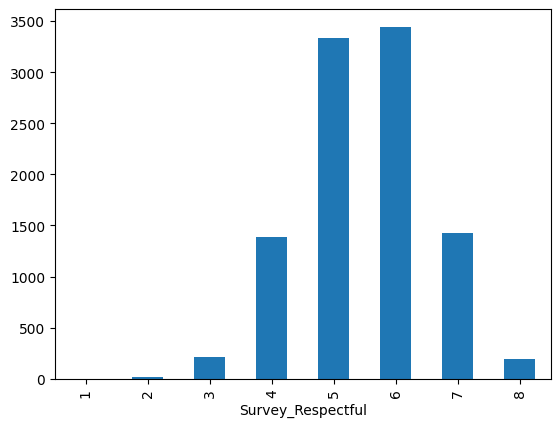

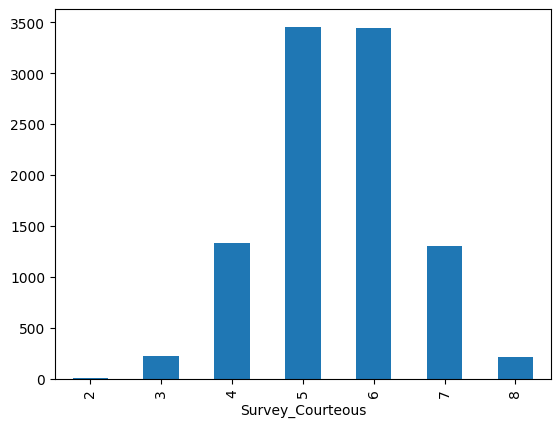

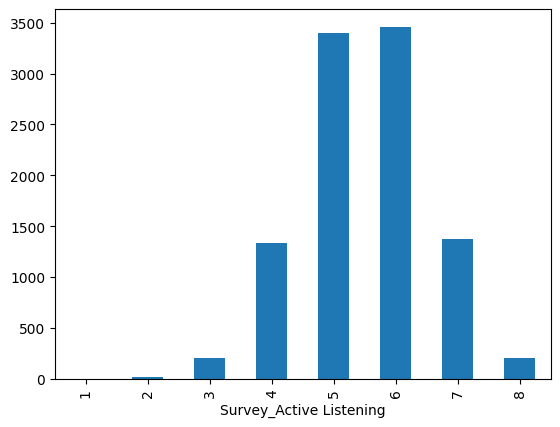

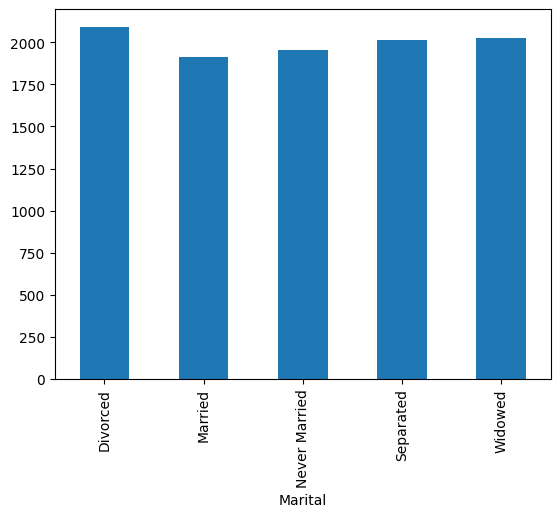

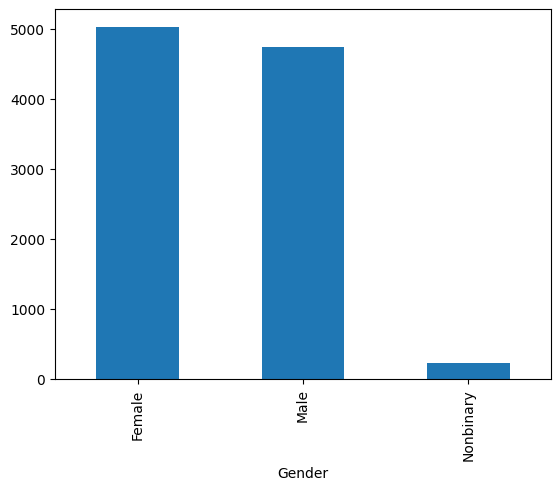

In [35]:
# Independent categorical variables univariate
for col in categorical_variables+yes_no_variables+survey_variables+onehot_variables :
    df[col].value_counts().sort_index().plot(kind='bar')
    plt.show()

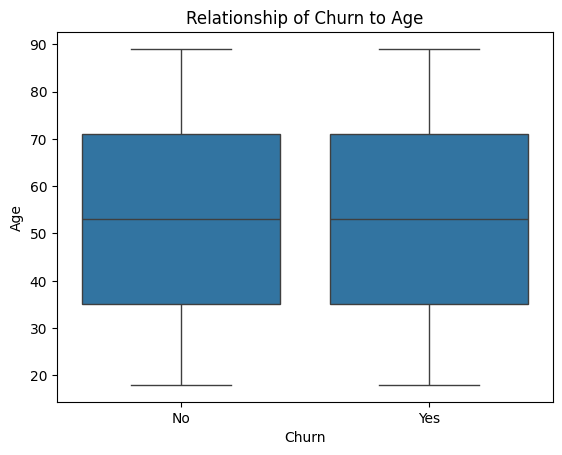

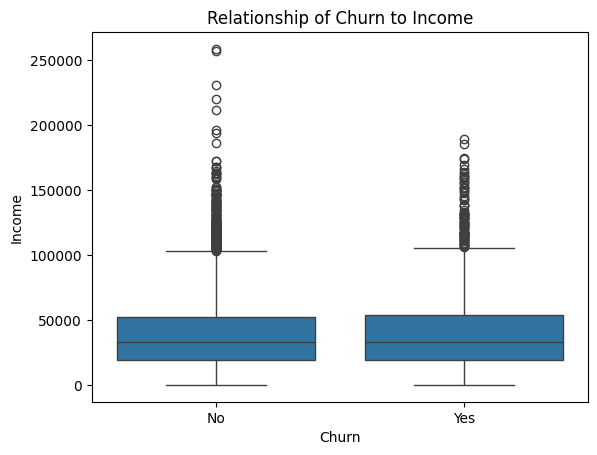

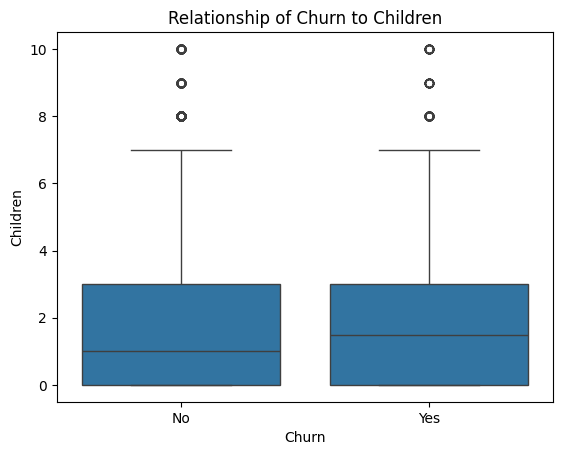

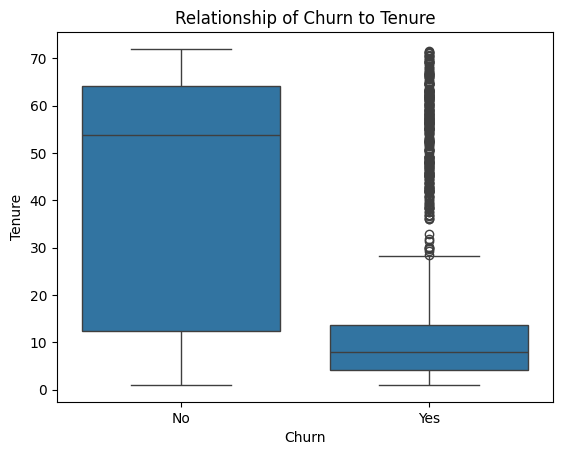

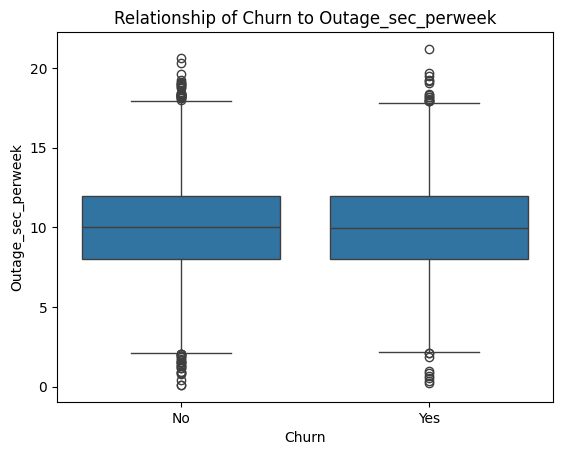

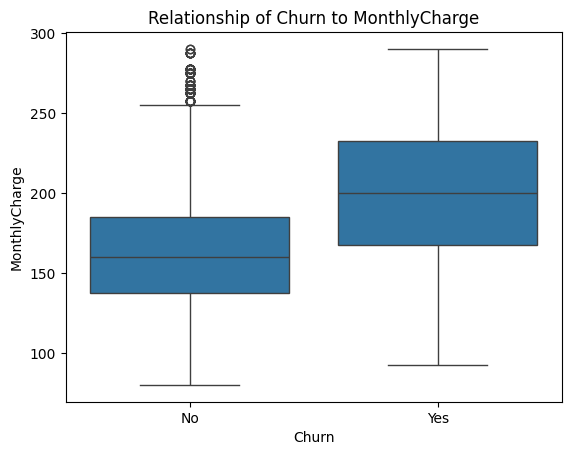

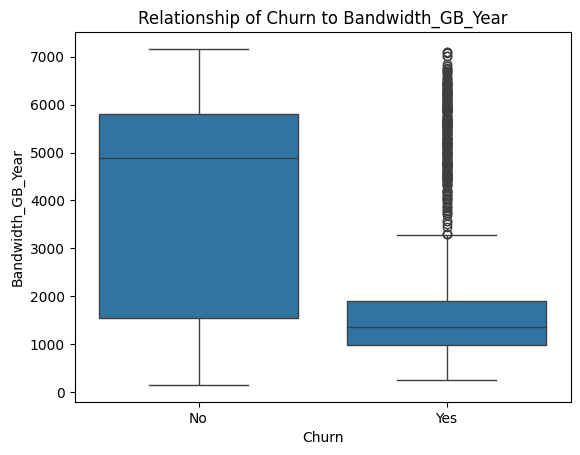

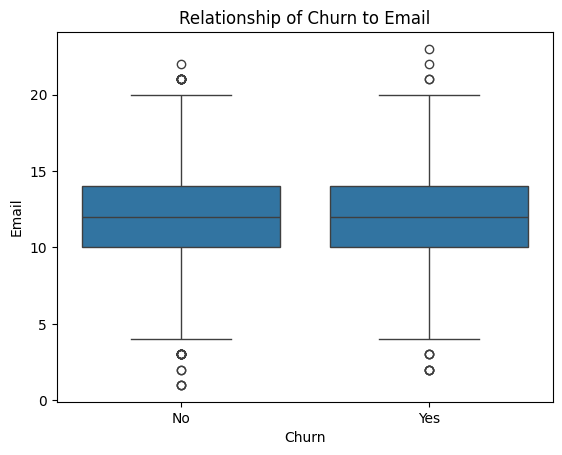

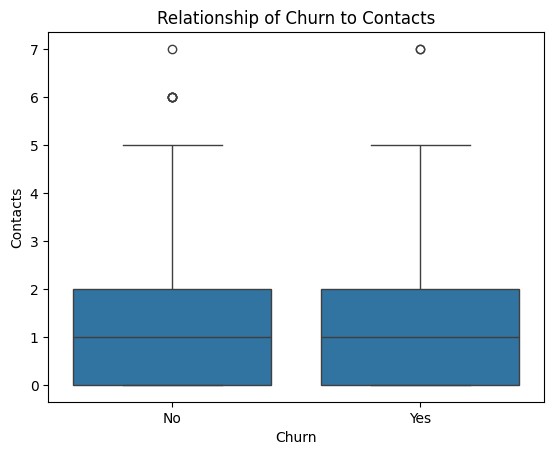

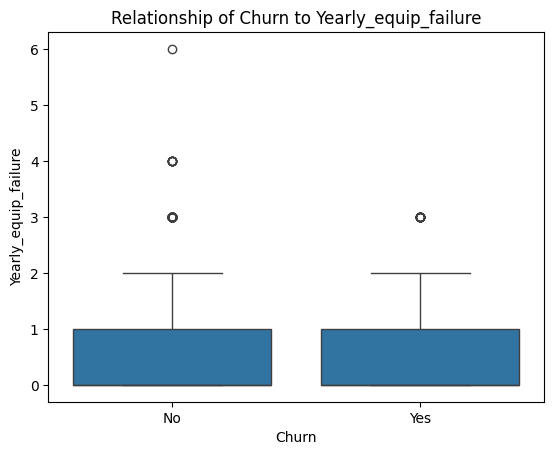

In [36]:
# Bivariate numerical
for col in numerical_variables :
    sns.boxplot(data=df, x='Churn', y=col)
    plt.title(f'Relationship of Churn to {col}')
    plt.show()

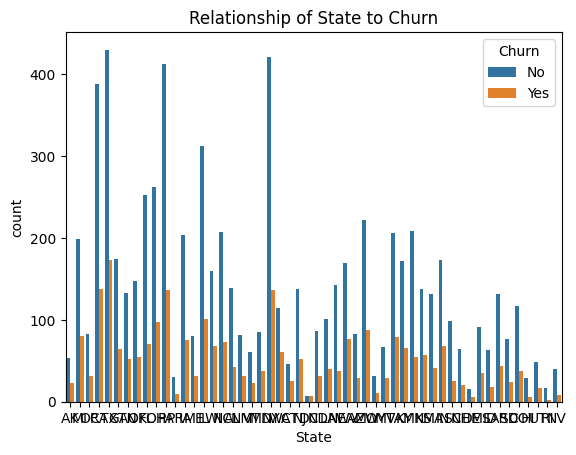

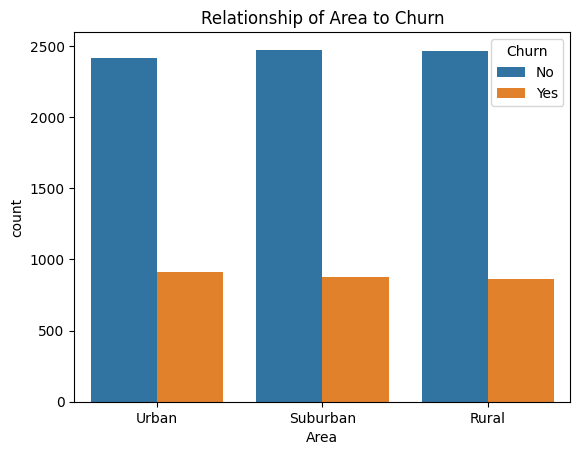

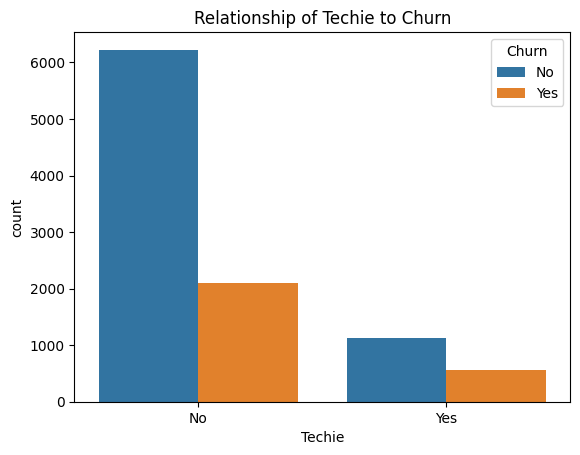

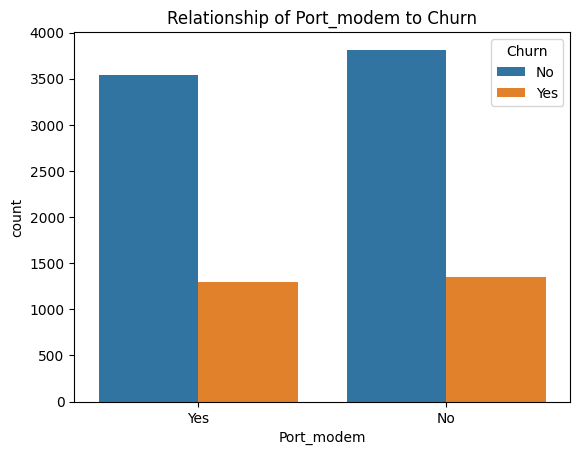

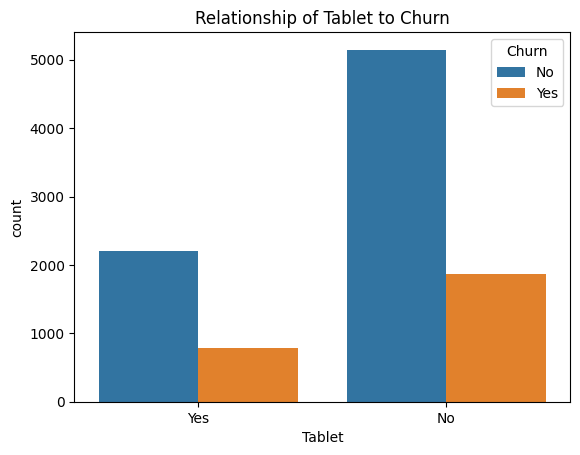

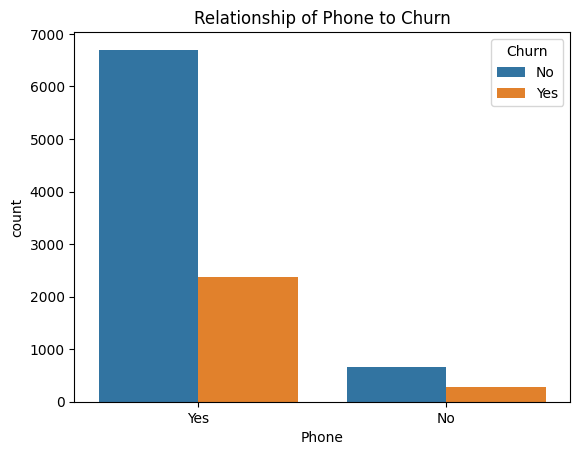

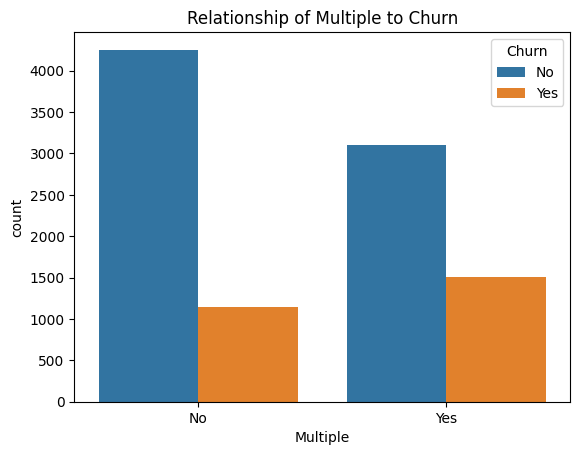

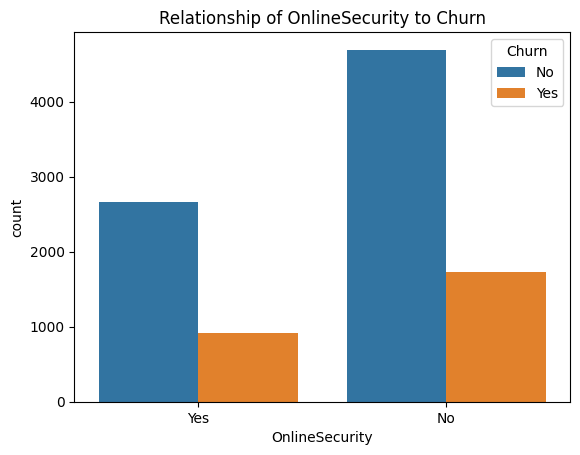

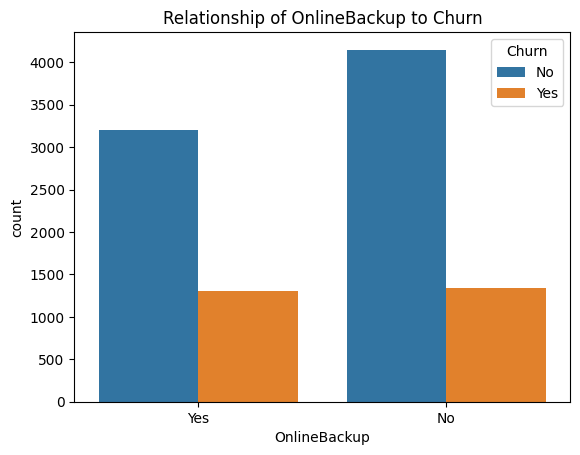

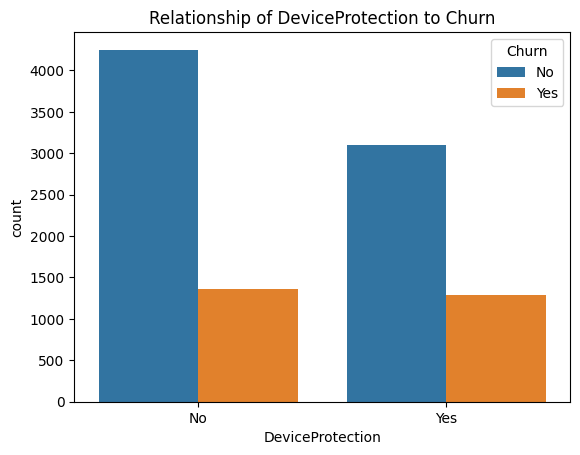

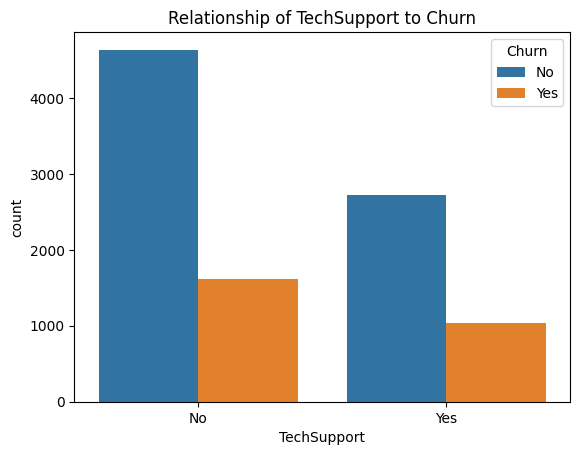

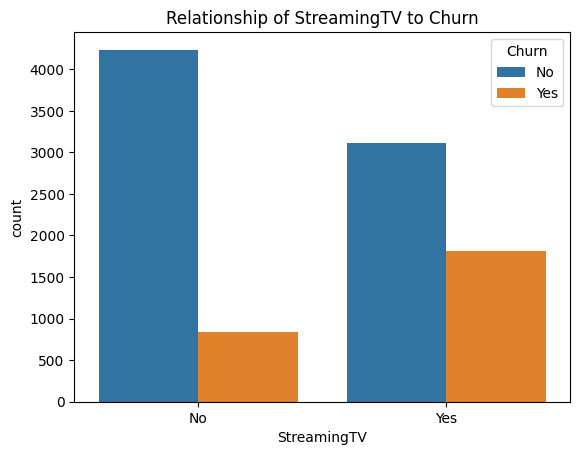

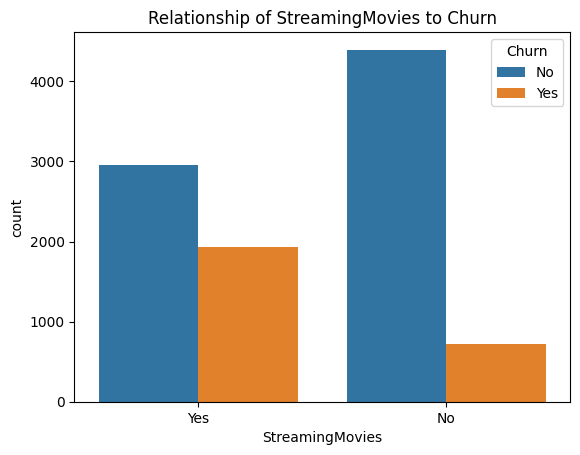

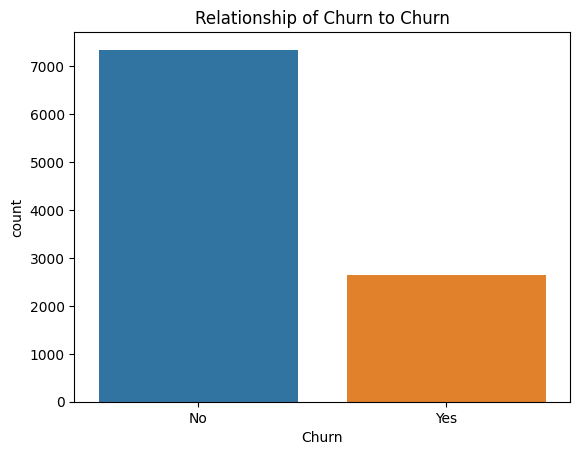

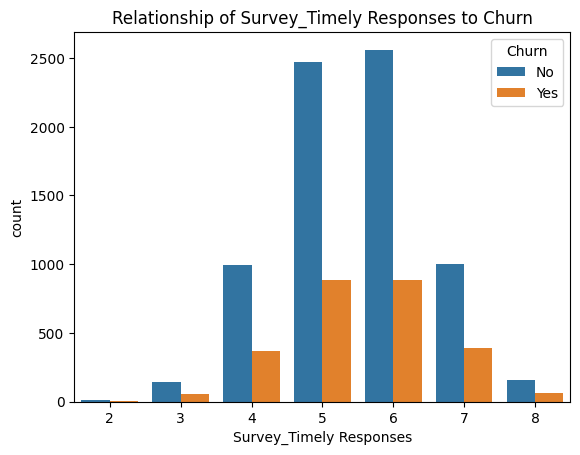

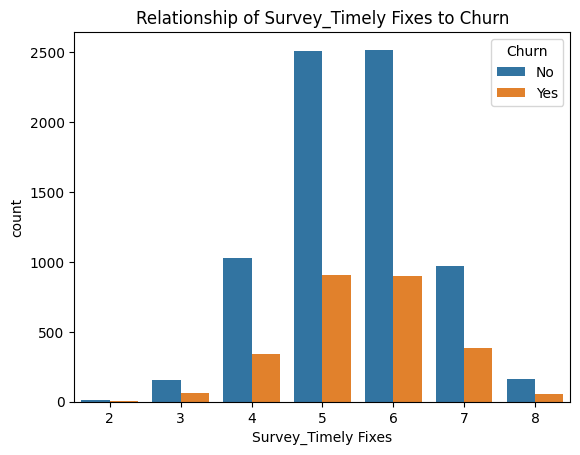

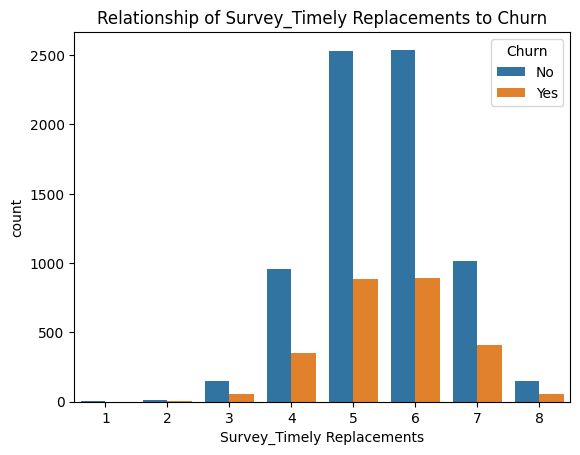

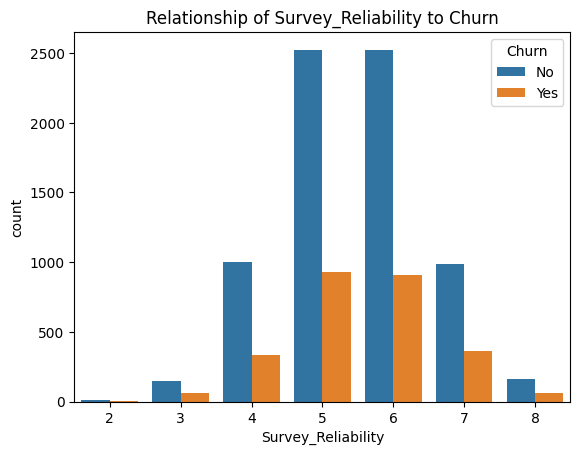

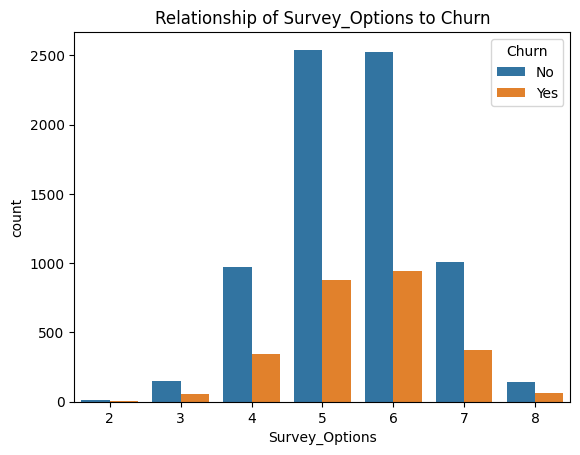

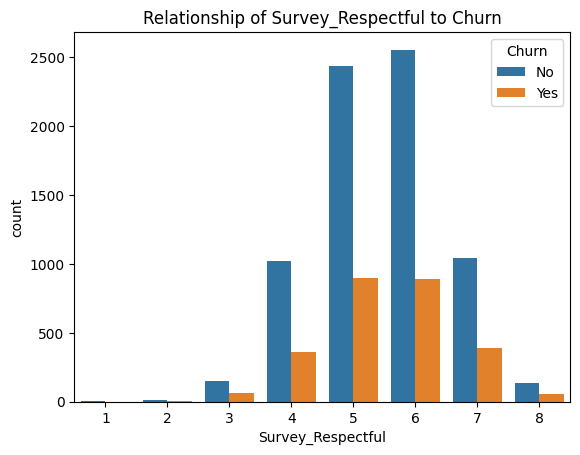

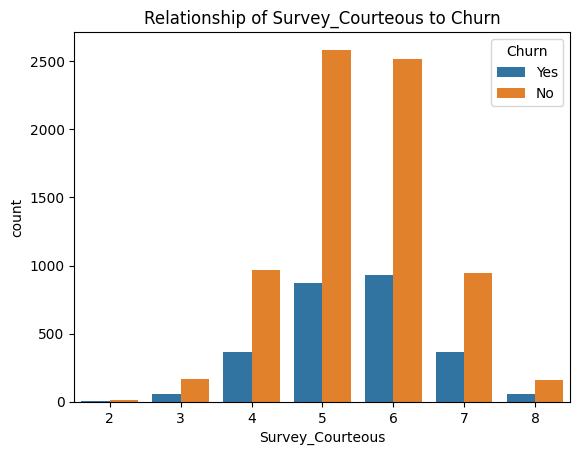

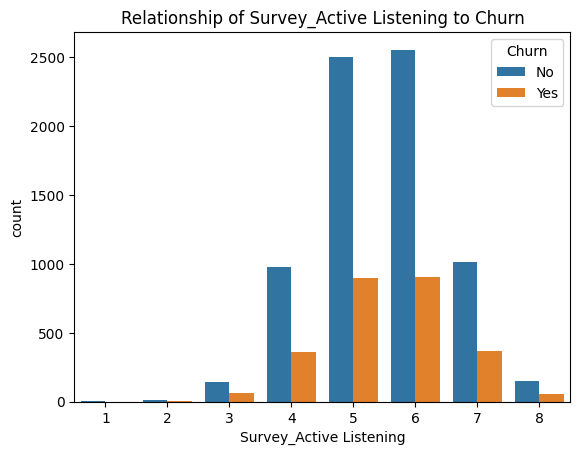

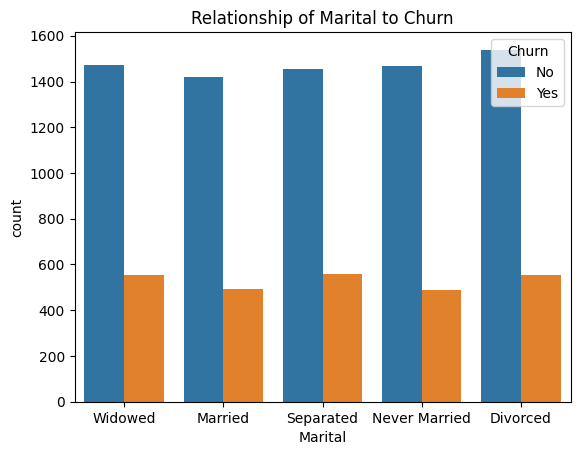

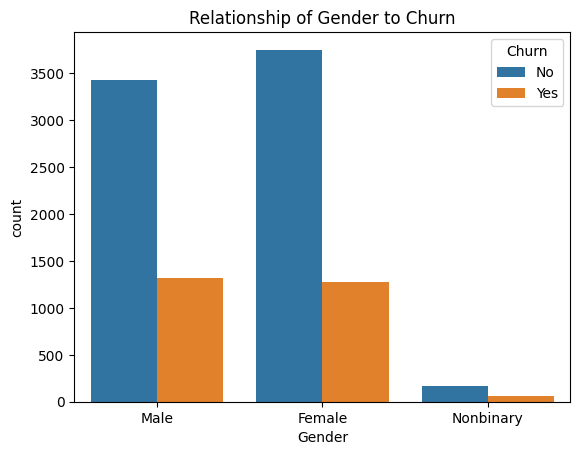

In [37]:
# Bivariate categorical
for col in categorical_variables+yes_no_variables+survey_variables+onehot_variables :
    sns.countplot(data=df, x=col, hue='Churn')
    plt.title(f'Relationship of {col} to Churn')
    plt.show()

In [38]:
df.to_csv('churn_prepared.csv',index=False)